In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

  Using cached numpy-2.1.3-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.9.2-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached numpy-2.1.3-cp310-cp310-win_amd64.whl (12.9 MB)
Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl (11.6 MB)
Using cached matplotlib-3.9.2-cp310-cp310-win_amd64.whl (7.8 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------

In [3]:
train = pd.read_csv('sales_train.csv')
test = pd.read_csv('test.csv')

train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
# We have supplementary files that contain additional information about the items, item categories, and shops. Let's load them and take a look at the first few rows.
items = pd.read_csv('items.csv')
item_cats = pd.read_csv('item_categories.csv')
shops = pd.read_csv('shops.csv')

In [5]:
# The item categories file contains the category name in Russian. We can extract the main category and subcategory from the category name.
item_cats['split'] = item_cats['item_category_name'].str.split('-')

item_cats['type'] = item_cats['split'].map(lambda x: x[0].strip())
item_cats['subtype'] = item_cats['split'].map(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())

item_cats = item_cats[['item_category_id','type','subtype']]
items = items.drop(['item_name'], axis=1) # we don't need the item name for now

shops['city'] = shops['shop_name'].str.split(' ').map(lambda x: x[0])
shops.loc[shops.city == '!Якутск', 'city'] = 'Якутск' # fix the city name

In [6]:
train.drop_duplicates(inplace=True)

In [7]:
# Merge the train data with the supplementary files
train = train.merge(items, on = 'item_id', how = 'left')
train = train.merge(item_cats, on = 'item_category_id', how = 'left')
train = train.merge(shops, on = 'shop_id', how = 'left')

train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,type,subtype,shop_name,city
0,02.01.2013,0,59,22154,999.00,1.0,37,Кино,Blu,"Ярославль ТЦ ""Альтаир""",Ярославль
1,03.01.2013,0,25,2552,899.00,1.0,58,Музыка,Винил,"Москва ТРК ""Атриум""",Москва
2,05.01.2013,0,25,2552,899.00,-1.0,58,Музыка,Винил,"Москва ТРК ""Атриум""",Москва
3,06.01.2013,0,25,2554,1709.05,1.0,58,Музыка,Винил,"Москва ТРК ""Атриум""",Москва
4,15.01.2013,0,25,2555,1099.00,1.0,56,Музыка,CD фирменного производства,"Москва ТРК ""Атриум""",Москва


In [8]:
# convert the date column to datetime format
train['date'] = pd.to_datetime(train['date'], format = '%d.%m.%Y')
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year

## Visualization

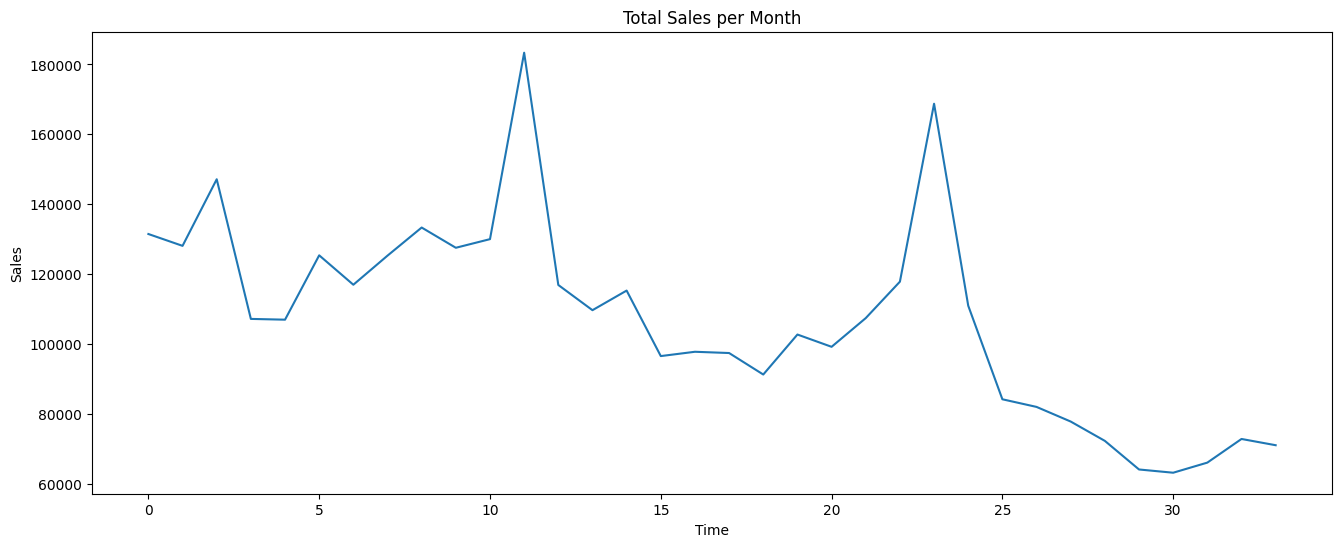

In [9]:
# Let's plot the total sales per month
monthly_sales = train.groupby(['year', 'month'], sort=False).agg({'item_cnt_day':'sum'})
monthly_sales = monthly_sales.reset_index()

plt.figure(figsize=(16,6))
plt.plot(monthly_sales['item_cnt_day'])
plt.title('Total Sales per Month')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show();

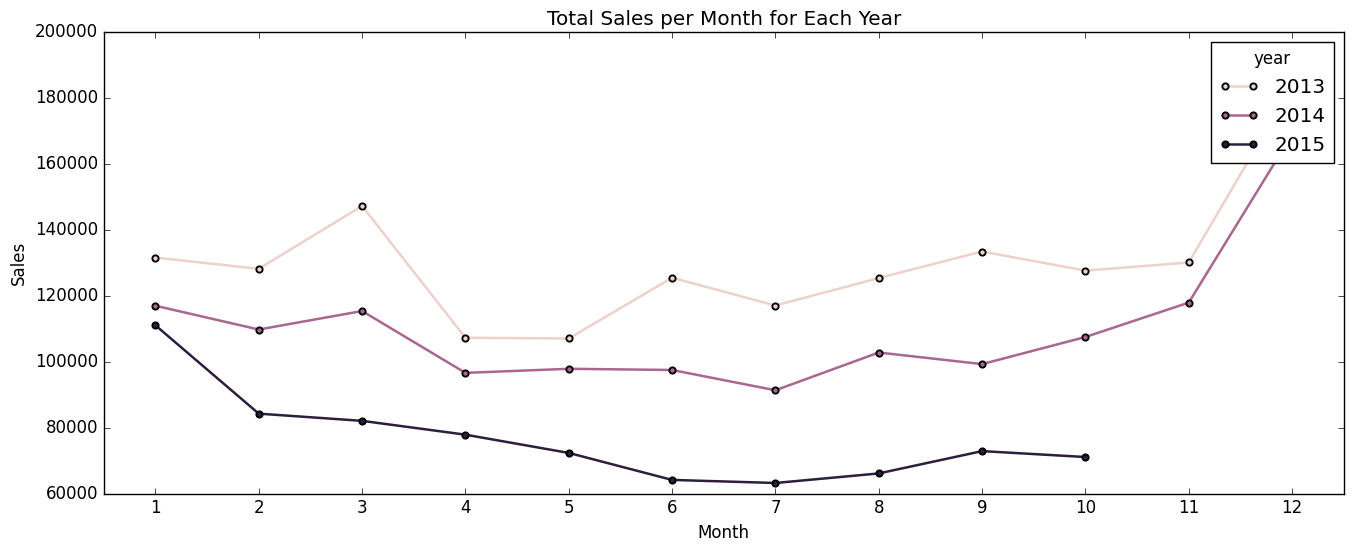

In [10]:
# Let's plot the total sales per month for each year
plt.figure(figsize=(16,6))
plt.style.use('classic')
sns.pointplot(x='month', y='item_cnt_day', hue='year', data=monthly_sales)
plt.title('Total Sales per Month for Each Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show();

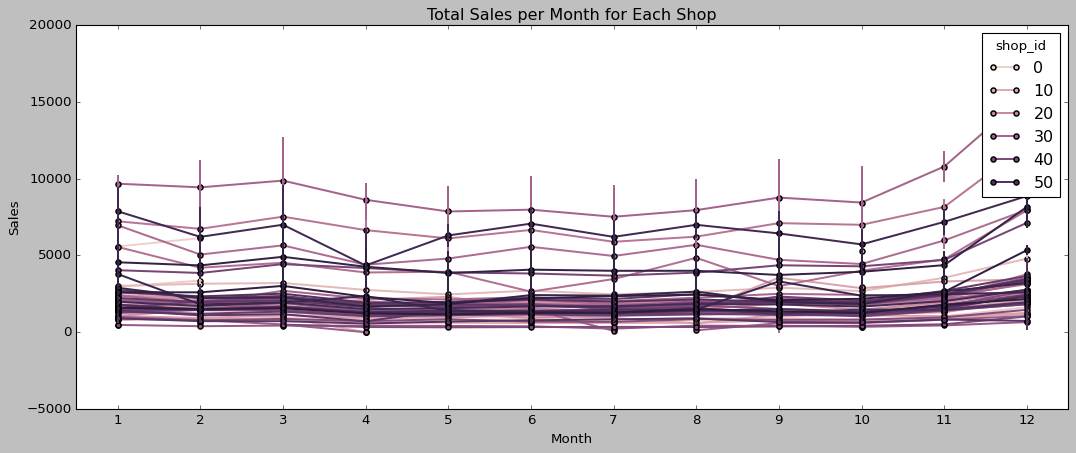

In [11]:
# Let's plot the total sales per month for each shop
shop_sales = train.groupby(['year', 'month', 'shop_id'], sort=False).agg({'item_cnt_day':'sum'})
shop_sales = shop_sales.reset_index()

plt.figure(figsize=(16,6))
plt.style.use('classic')
sns.pointplot(x='month', y='item_cnt_day', hue='shop_id', data=shop_sales)
plt.title('Total Sales per Month for Each Shop')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show();

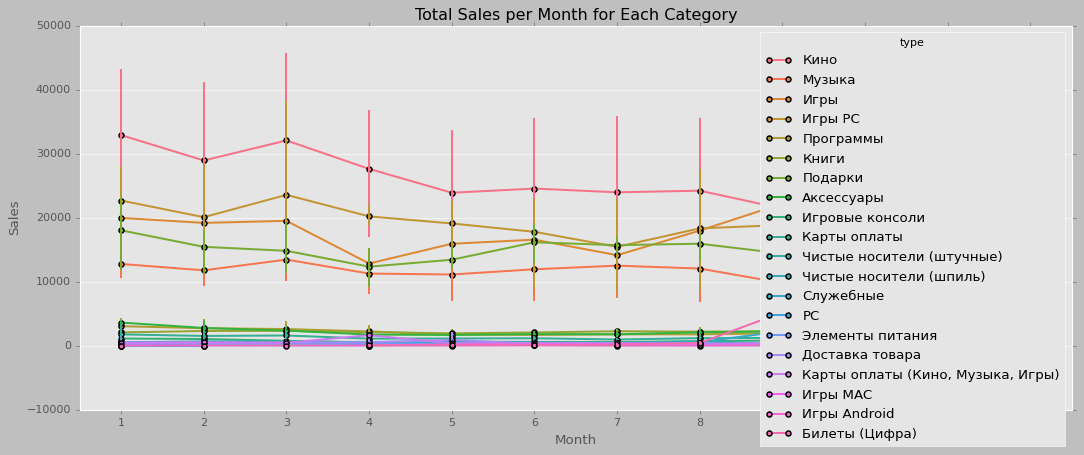

In [12]:
# Let's plot the total sales per month for each item category
category_sales = train.groupby(['year', 'month', 'type'], sort=False).agg({'item_cnt_day':'sum'})
category_sales = category_sales.reset_index()

plt.figure(figsize=(16,6))
plt.style.use('ggplot')
sns.pointplot(x='month', y='item_cnt_day', hue='type', data=category_sales)
plt.title('Total Sales per Month for Each Category')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show();

## Time Series Analysis

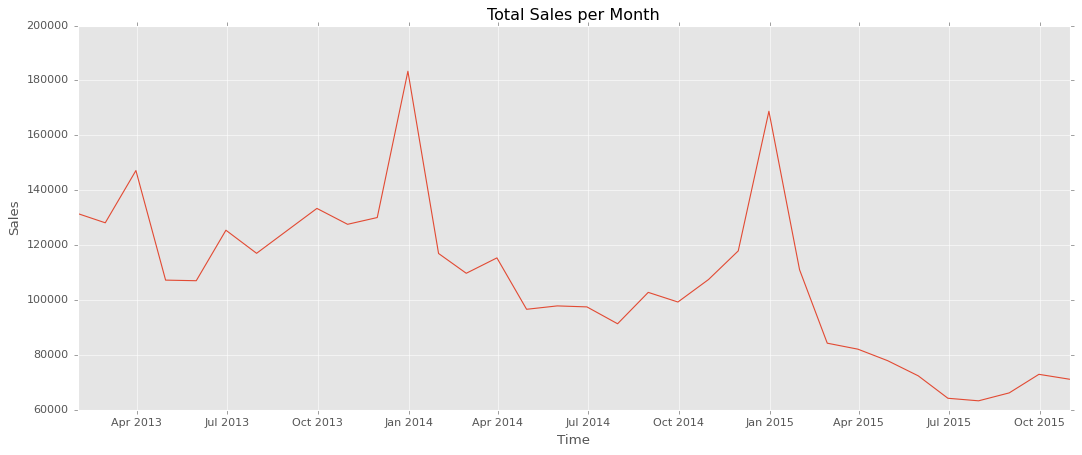

In [13]:
# We are now going to prep our data for time series analysis, we will aggregate the data to monthly level and the index will be the date.
ts = train.groupby(['date']).agg({'item_cnt_day':'sum'})
ts.columns = ['item_cnt_month']
ts.index = pd.to_datetime(ts.index)
ts = ts.resample('M').sum()

# Let's plot the time series data
plt.figure(figsize=(16,6))
plt.plot(ts)
plt.title('Total Sales per Month')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show();

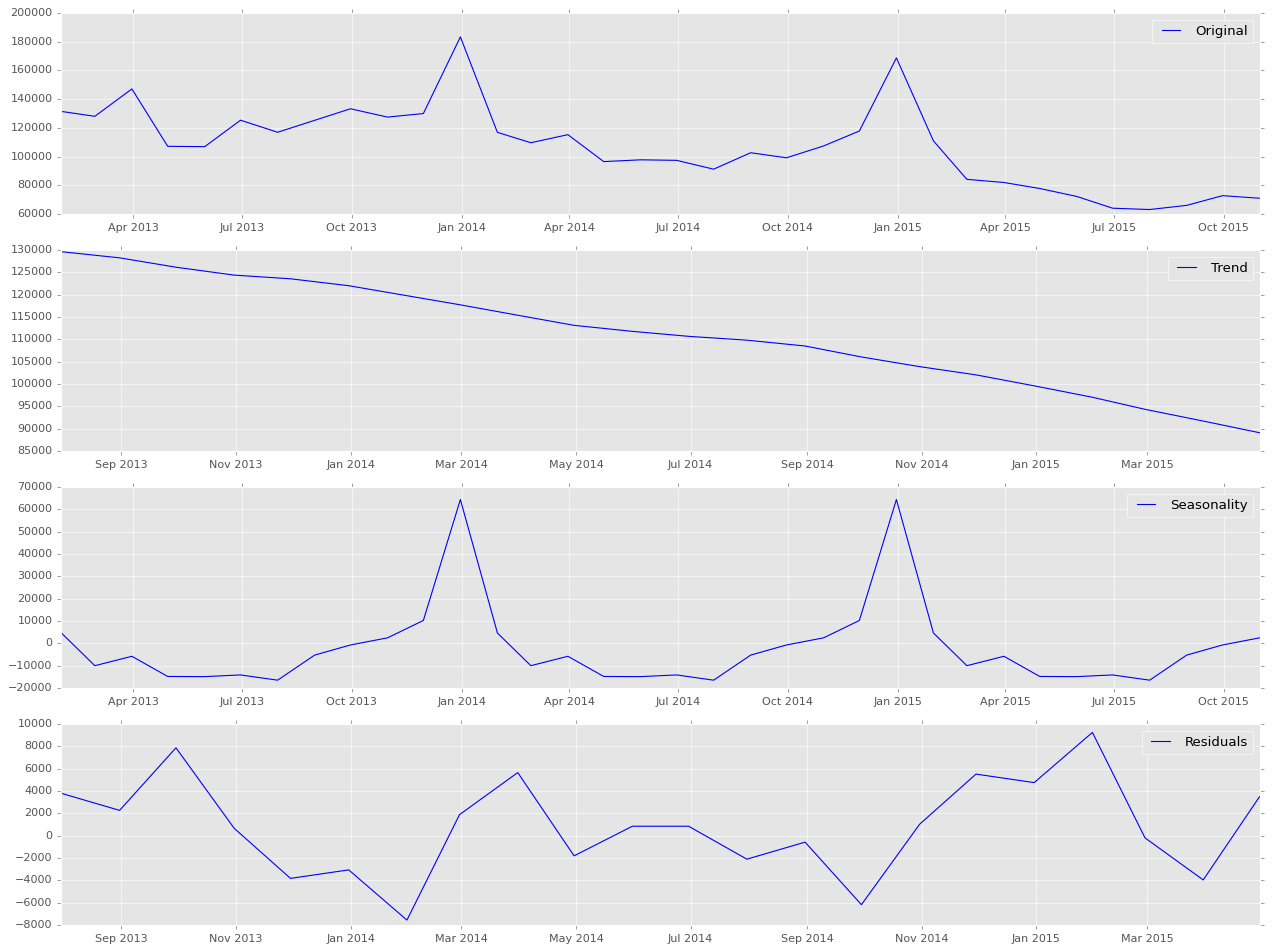

In [14]:
# Let's now decompose the time series data into trend, seasonality, and residuals
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,12))
plt.subplot(411)
plt.plot(ts, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()


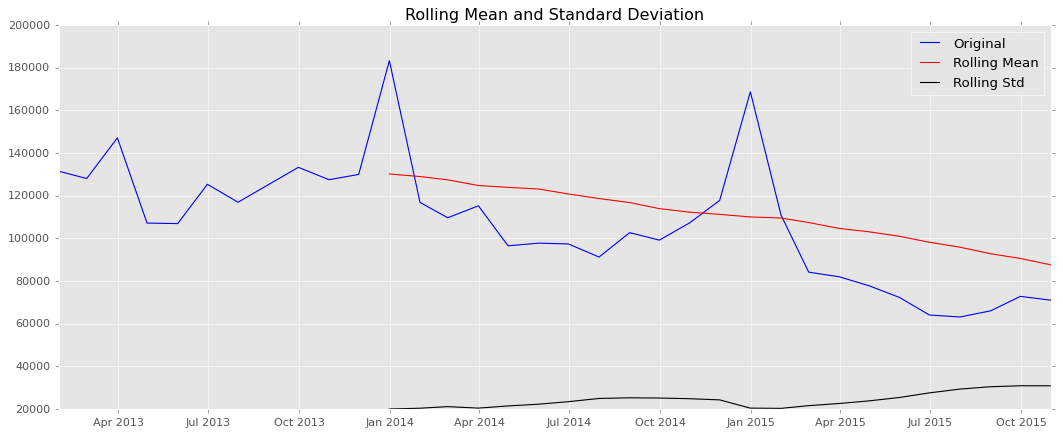

Results of Dickey-Fuller Test:
Test Statistic                 -2.395688
p-value                         0.142957
#Lags Used                      0.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


In [15]:
# Let's check the stationarity of the time series data
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(16,6))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['item_cnt_month'])

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(ts)

# To tell if it is stationary, we look at the p-value. If p-value is less than 0.05, we reject the null hypothesis and say that the series is stationary. In this case, the p-value is greater than 0.05, so we fail to reject the null hypothesis and say that the series is non-stationary.

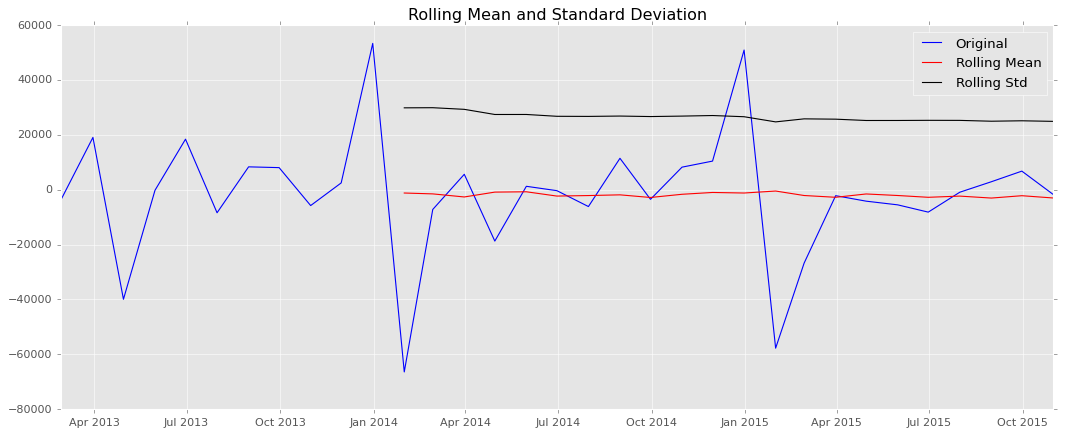

Results of Dickey-Fuller Test:
Test Statistic                -1.363698e+01
p-value                        1.681058e-25
#Lags Used                     1.000000e+01
Number of Observations Used    2.200000e+01
Critical Value (1%)           -3.769733e+00
Critical Value (5%)           -3.005426e+00
Critical Value (10%)          -2.642501e+00
dtype: float64


In [16]:
# We can make the time series stationary by differencing the series and testing for stationarity again.
ts_diff = ts - ts.shift()
ts_diff.dropna(inplace=True)
test_stationarity(ts_diff)

* The p-value is less than 0.05, so we reject the null hypothesis and say that the series is stationary.

                               SARIMAX Results                                
Dep. Variable:         item_cnt_month   No. Observations:                   34
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -376.851
Date:                Fri, 08 Nov 2024   AIC                            765.703
Time:                        15:52:44   BIC                            774.682
Sample:                    01-31-2013   HQIC                           768.724
                         - 10-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2029      0.097     -2.085      0.037      -0.394      -0.012
ar.L2         -0.1031      0.122     -0.846      0.397      -0.342       0.136
ar.L3         -0.1348      0.157     -0.858      0.3

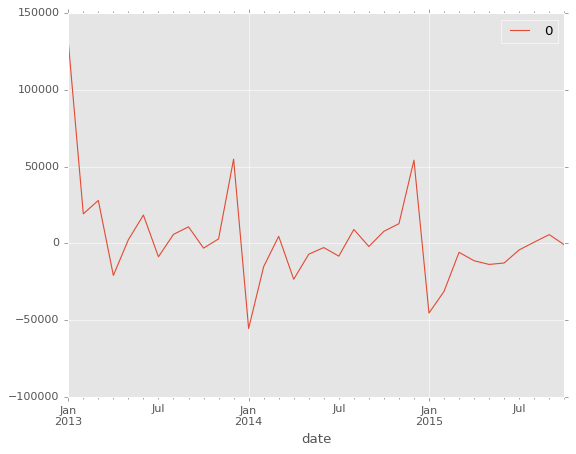

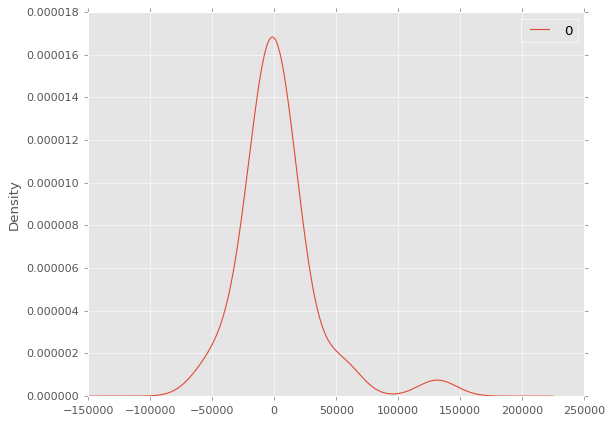

                   0
count      34.000000
mean     2831.272457
std     31640.682666
min    -55443.263817
25%    -10675.992493
50%     -1480.400990
75%      8737.260363
max    131478.000000


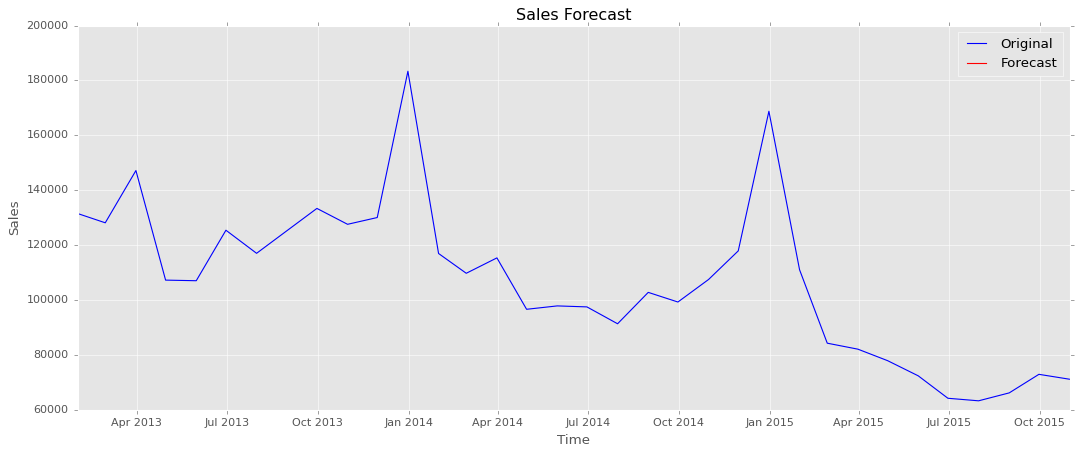

In [26]:
# We now have a stationary time series data. We will use the ARIMA model for this task.
from statsmodels.tsa.arima.model import ARIMA

# Fit model
model = ARIMA(ts, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

# Make predictions
# Create future dates for forecasting
last_date = ts.index[-1]
future_dates = pd.date_range(start=last_date, periods=7, freq='M')[1:]  # Exclude the last known date

# Generate forecast
forecast = model_fit.forecast(steps=6)
forecast_df = pd.DataFrame(forecast, index=future_dates, columns=['item_cnt_month'])

# Plot the forecast
plt.figure(figsize=(16,6))
plt.plot(ts.index, ts['item_cnt_month'], label='Original', color='blue')
plt.plot(forecast_df.index, forecast_df['item_cnt_month'], label='Forecast', color='red')
plt.legend(loc='best')
plt.title('Sales Forecast')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

In [29]:
test = pd.read_csv('test.csv')

In [30]:
# Create predictions for each shop-item pair in test set
test['date_block_num'] = 34  # This is the month we're predicting for
test = test.merge(items, on='item_id', how='left')
test = test.merge(item_cats, on='item_category_id', how='left')
test = test.merge(shops, on='shop_id', how='left')

# Create predictions
# We'll use the mean of the last 3 months for each shop-item pair as our prediction
# First, get the last 3 months of data
last_3_months = train[train.date_block_num >= 31]  # 31,32,33 are the last 3 months

# Calculate mean sales for each shop-item pair
shop_item_means = last_3_months.groupby(['shop_id', 'item_id'])['item_cnt_day'].agg('mean').reset_index()
shop_item_means.columns = ['shop_id', 'item_id', 'item_cnt_month']

# Merge predictions with test data
submission = test.merge(shop_item_means, on=['shop_id', 'item_id'], how='left')

# Fill missing values with 0 (for shop-item pairs that haven't been sold before)
submission['item_cnt_month'] = submission['item_cnt_month'].fillna(0)

# Clip the predictions to the required range [0,20]
submission['item_cnt_month'] = submission['item_cnt_month'].clip(0, 20)

# Prepare submission file
submission_file = submission[['ID', 'item_cnt_month']]
print("\nSubmission file shape:", submission_file.shape)
print("\nSubmission sample:")
print(submission_file.head())

# Save to CSV
submission_file.to_csv('submission.csv', index=False)
print("\nSubmission file has been saved as 'submission.csv'")

# Basic statistics of our predictions
print("\nPrediction statistics:")
print(submission_file['item_cnt_month'].describe())


Submission file shape: (214200, 2)

Submission sample:
   ID  item_cnt_month
0   0             1.0
1   1             0.0
2   2             1.0
3   3             1.0
4   4             0.0

Submission file has been saved as 'submission.csv'

Prediction statistics:
count    214200.000000
mean          0.277259
std           0.508620
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: item_cnt_month, dtype: float64


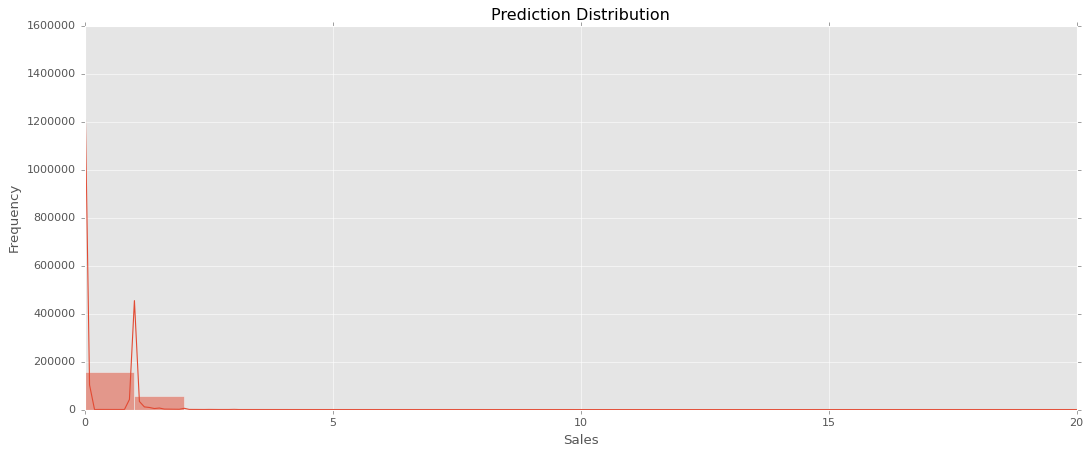

In [31]:
# Let's plot the distribution of our predictions
plt.figure(figsize=(16,6))
sns.histplot(submission_file['item_cnt_month'], bins=20, kde=True)
plt.title('Prediction Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show();

c:\Users\My-PC\Daily-ML\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                       item_cnt_month   No. Observations:                   34
Model:             SARIMAX(5, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -219.748
Date:                              Fri, 08 Nov 2024   AIC                            455.496
Time:                                      16:07:07   BIC                            463.852
Sample:                                  01-31-2013   HQIC                           457.309
                                       - 10-31-2015                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0207      0.154      0.135      0.893      -0.280       0.322
ar.L2          0.01

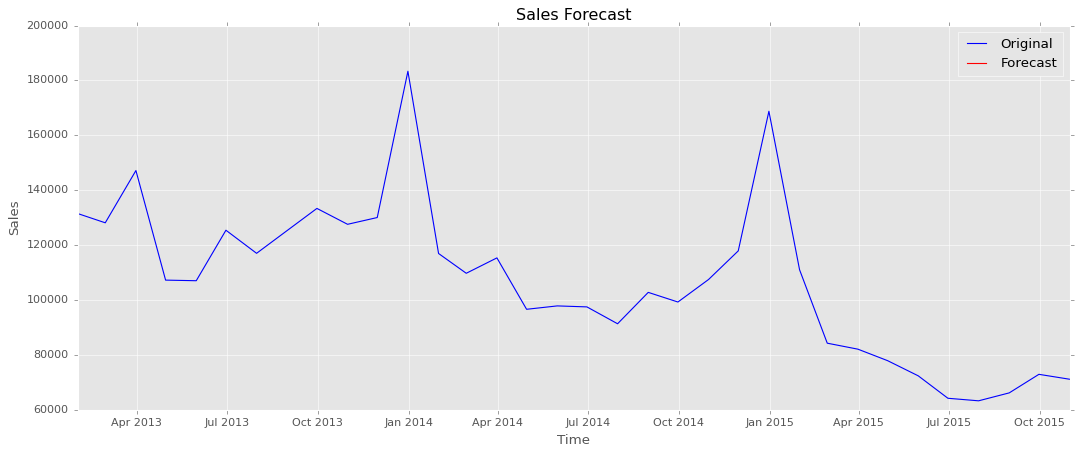

In [32]:
# SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit model
model = SARIMAX(ts, order=(5,1,0), seasonal_order=(1,1,1,12))
model_fit = model.fit()
print(model_fit.summary())

# Make predictions
# Generate forecast
forecast = model_fit.forecast(steps=6)
forecast_df = pd.DataFrame(forecast, index=future_dates, columns=['item_cnt_month'])

# Plot the forecast
plt.figure(figsize=(16,6))
plt.plot(ts.index, ts['item_cnt_month'], label='Original', color='blue')
plt.plot(forecast_df.index, forecast_df['item_cnt_month'], label='Forecast', color='red')
plt.legend(loc='best')
plt.title('Sales Forecast')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

In [34]:
test = pd.read_csv('test.csv')

In [35]:
# Predictions for test set
# Create predictions for each shop-item pair in test set
test['date_block_num'] = 34  # This is the month we're predicting for
test = test.merge(items, on='item_id', how='left')
test = test.merge(item_cats, on='item_category_id', how='left')
test = test.merge(shops, on='shop_id', how='left')

# Create predictions
# We'll use the mean of the last 3 months for each shop-item pair as our prediction
# First, get the last 3 months of data
last_3_months = train[train.date_block_num >= 31]  # 31,32,33 are the last 3 months

# Calculate mean sales for each shop-item pair
shop_item_means = last_3_months.groupby(['shop_id', 'item_id'])['item_cnt_day'].agg('mean').reset_index()
shop_item_means.columns = ['shop_id', 'item_id', 'item_cnt_month']

# Merge predictions with test data
submission = test.merge(shop_item_means, on=['shop_id', 'item_id'], how='left')

# Fill missing values with 0 (for shop-item pairs that haven't been sold before)
submission['item_cnt_month'] = submission['item_cnt_month'].fillna(0)

# Clip the predictions to the required range [0,20]
submission['item_cnt_month'] = submission['item_cnt_month'].clip(0, 20)

# Prepare submission file
submission_file = submission[['ID', 'item_cnt_month']]
print("\nSubmission file shape:", submission_file.shape)
print("\nSubmission sample:")
print(submission_file.head())

# Save to CSV
submission_file.to_csv('submit.csv', index=False)


Submission file shape: (214200, 2)

Submission sample:
   ID  item_cnt_month
0   0             1.0
1   1             0.0
2   2             1.0
3   3             1.0
4   4             0.0


In [36]:
# Basic statistics of our predictions
print("\nPrediction statistics:")
print(submission_file['item_cnt_month'].describe())


Prediction statistics:
count    214200.000000
mean          0.277259
std           0.508620
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: item_cnt_month, dtype: float64


In [41]:
!pip install scikit-learn
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import gc

# Create features from time series data
def create_features(data):
    # Group by month and shop-item pairs
    monthly_sales = data.groupby(
        ['date_block_num', 'shop_id', 'item_id']
    )['item_cnt_day'].sum().reset_index()
    
    # Rename target
    monthly_sales['item_cnt_month'] = monthly_sales['item_cnt_day']
    monthly_sales.drop('item_cnt_day', axis=1, inplace=True)
    
    # Create lagged features (previous months' sales)
    for i in [1,2,3,6,12]:
        monthly_sales[f'lag_{i}'] = monthly_sales.groupby(
            ['shop_id', 'item_id']
        )['item_cnt_month'].shift(i)
    
    # Create rolling mean features
    for i in [3,6,12]:
        monthly_sales[f'rolling_mean_{i}'] = monthly_sales.groupby(
            ['shop_id', 'item_id']
        )['item_cnt_month'].transform(
            lambda x: x.shift(1).rolling(i).mean()
        )
    
    # Add month and year
    monthly_sales['month'] = monthly_sales['date_block_num'] % 12
    
    return monthly_sales

# Prepare the data
print("Creating features...")
monthly_data = create_features(train)

# Split into training and validation
X_train = monthly_data[monthly_data.date_block_num < 33].copy()
X_valid = monthly_data[monthly_data.date_block_num == 33].copy()

# Drop rows with missing values (first year will have missing lagged features)
X_train.dropna(inplace=True)
X_valid.dropna(inplace=True)

# Prepare feature columns
feature_columns = ['lag_1', 'lag_2', 'lag_3', 'lag_6', 'lag_12',
                  'rolling_mean_3', 'rolling_mean_6', 'rolling_mean_12',
                  'month', 'shop_id', 'item_id']

# Train XGBoost model
print("Training XGBoost model...")
model = XGBRegressor(
    max_depth=8,
    n_estimators=1000,
    min_child_weight=300,
    colsample_bytree=0.8,
    subsample=0.8,
    eta=0.3,
    seed=42
)

model.fit(
    X_train[feature_columns],
    X_train['item_cnt_month'],
    eval_metric="rmse",
    eval_set=[(X_valid[feature_columns], X_valid['item_cnt_month'])],
    verbose=True,
    early_stopping_rounds=10
)

# Prepare test data
print("Preparing test data...")
test['date_block_num'] = 34

# Create features for test data
test_monthly = monthly_data[monthly_data.date_block_num > 21].copy()  # Last year of data
test_shop_items = test[['shop_id', 'item_id']].copy()
test_shop_items['date_block_num'] = 34
test_monthly = pd.concat([test_monthly, test_shop_items], axis=0, ignore_index=True)
test_monthly = create_features(test_monthly)

# Make predictions
print("Making predictions...")
test_monthly.fillna(0, inplace=True)  # Fill missing values
predictions = model.predict(test_monthly[test_monthly.date_block_num == 34][feature_columns])

# Prepare submission
submission = test[['ID']].copy()
submission['item_cnt_month'] = predictions
submission['item_cnt_month'] = submission['item_cnt_month'].clip(0, 20)

# Save submission
submission.to_csv('xgb_submission.csv', index=False)
print("Submission saved to 'xgb_submission.csv'")

# Print feature importance
importance_df = pd.DataFrame({
    'feature': feature_columns,
    'importance': model.feature_importances_
})
print("\nFeature Importance:")
print(importance_df.sort_values('importance', ascending=False))

Creating features...
